# Sales Analysis

### Introduction

This is a small data analysis project done primarily using python libraries like pandas and matplotlib to perform analysis on 12 months sales data of a random XYZ supermarket for the year 2019. This project tries to perform real time analysis by trying to answer few questions which I thought may arise in any sales related organization. The following questions can be from stakeholders like sales team, marketing team and managers. As a part of the data analysis team, it is our job to perform analysis and try to give insights from data to improve the sales and income of the organization. 

##### Questions by Stakeholders:

Q1 : What was the best month for sales ? How much was earned that month ?

Q2 : What city sold most product ?

Q3 : What time of the day should advertisements be displayedto maximize the likelihood of the consumer's buying the product?

Q4 : What products are most often sold together ?

Q5 : What product sold the most and what is the sales for each of the product ?

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

### Import and Merge Data

The raw data provided by the sales team is in twelve different csv files, with one csv file for each month. All the twelve files has to be merged into a single file for comfort.

In [2]:
for name in glob.glob(r"D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\*.csv"):
    print(name)

D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_April_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_August_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_December_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_February_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_January_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_July_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_June_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_March_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_May_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\Sales_November_2019.csv
D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\S

In [3]:
all_files = glob.glob(r"D:\1_DATA\Data Analysis Project\Sales Analysis\SalesAnalysis\Sales_Data\*.csv")

all_data = pd.DataFrame()

for filename in all_files:
    df=pd.read_csv(filename, index_col=None, header=0)
    all_data=pd.concat([all_data, df])


all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [4]:
df.loc[df["Order ID"]=="Order ID"].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


We can see that heading row has been repeated in multiple rows in data. Now we have to remove these rows and create clean data frame

In [5]:
print(all_data.shape)

(186849, 6)


In [6]:
all_data.drop(all_data[all_data["Order ID"]=="Order ID"].index, inplace=True)
print(all_data.shape)

(183270, 6)


In [7]:
all_data.to_csv(r"D:\1_DATA\Data Analysis Project\Sales Analysis\complete_data.csv", index=False)

A backup csv file with all the 12 months data merged has been created in a single file, this can be used in any other analysis.

### Clean up Empty Rows

Data will not always be clean, we have to always check for emplty rows becuase most datasets will have empty rows. Therefore, the next step is to identify empty rows and remove them.

In [8]:
dataf=pd.read_csv(r"D:\1_DATA\Data Analysis Project\Sales Analysis\complete_data.csv")
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
print(dataf.shape)

(183270, 6)


In [10]:
dataf.isnull().sum()

Order ID            537
Product             537
Quantity Ordered    537
Price Each          537
Order Date          537
Purchase Address    537
dtype: int64

In [11]:
dataf.dropna(thresh=6, inplace=True)
print(dataf.shape)

(182733, 6)


In [12]:
dataf.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

We identified 537 empty rows in all the columns and removed all the empty rows and confirmed again to check if the all the empty rows has been removed.
Now with this cleaned data , we can start analysing and answering the questions.

## Question 1 : What was the best month for sales ? How much was earned that month ?

In [13]:
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [14]:
dataf["Month"] = dataf["Order Date"].str[0:2]
dataf.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
183260,259349.0,AAA Batteries (4-pack),1.0,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",09
183261,259350.0,Google Phone,1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",09
183262,259350.0,USB-C Charging Cable,1.0,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",09
183263,259351.0,Apple Airpods Headphones,1.0,150.00,09/01/19 19:43,"981 4th St, New York City, NY 10001",09
183264,259352.0,USB-C Charging Cable,1.0,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",09
183265,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
183266,259354.0,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
183267,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
183268,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
183269,259357.0,USB-C Charging Cable,1.0,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


In [15]:
dataf.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
dtype: object

In [16]:
dataf["Month"]=dataf["Month"].astype("int32")
dataf.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [17]:
dataf.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4


In [18]:
dataf["Total Sales"] = dataf["Quantity Ordered"] * dataf["Price Each"]
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [19]:
sales_df = dataf[["Month","Total Sales"]].groupby("Month").sum()
sales_df.sort_values(by=["Total Sales"], ascending=False)

,Total Sales
Month,
12,4558769.40
10,3678994.30
4,3337287.37
11,3148902.77
5,3103832.33
3,2753653.39
7,2585513.61
6,2528721.42
8,2192498.48


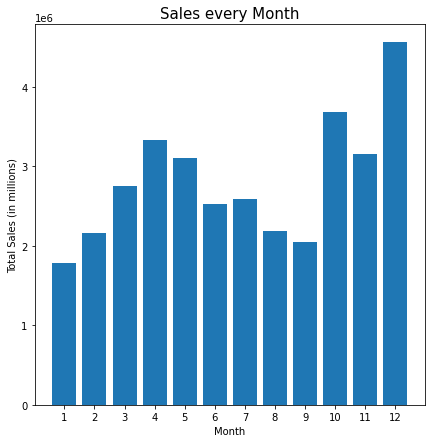

In [20]:
plt.figure(figsize=(7,7))

plt.bar(sales_df.index, sales_df["Total Sales"])
plt.xticks(sales_df.index)
plt.title("Sales every Month", fontdict={'fontsize': 15})
plt.xlabel("Month")
plt.ylabel("Total Sales (in millions)")
plt.show()

From the barchart and the grouped table we can obersve that sales is highest in the month of December (12th month) 2019, this is because it is holiday time and most importantly Christmas. October and November are also months with highest sales, we can see that year end is the time when a lot of shopping is done. Additionally, April is the month with 3rd highest sales, this maybe due to spring and summer season where people spend a lot of time outdoors.

## Question 2 : What city sold most product ?

In [21]:
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [22]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(" ")[-2]

dataf["City"] = dataf["Purchase Address"].apply(lambda x : get_city(x)+", "+get_state(x))
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [23]:
city_df = dataf[["City","Total Sales"]].groupby("City").sum()
city_df.sort_values(by=["Total Sales"], ascending=False)

,Total Sales
City,
"San Francisco, CA",8116947.55
"Los Angeles, CA",5354295.16
"New York City, NY",4587719.93
"Boston, MA",3601509.53
"Atlanta, GA",2743635.41
"Dallas, TX",2720640.90
"Seattle, WA",2692470.90
"Portland, OR",1832766.76
"Austin, TX",1790874.04


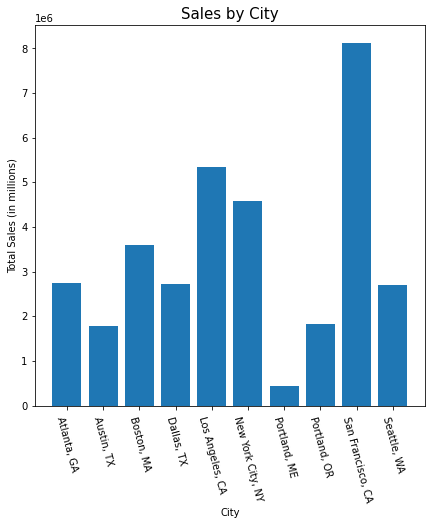

In [24]:
plt.figure(figsize=(7,7))

plt.bar(city_df.index, city_df["Total Sales"])
plt.xticks(rotation=-75)
plt.title("Sales by City", fontdict={'fontsize': 15})
plt.xlabel("City")
plt.ylabel("Total Sales (in millions)")
plt.show()

From the barplot and the table we can see that San Francisco, California has the most amount of sale than any other state by a huge margin, following San Francisco in with second highest sale is 2019 is Los Angeles, California and then New York City, New York. On the other end of the spectrum is Portland, Maine which has the lowest sale, less than $1 million. Therfore, we have to work to improve sales in Portland and other cities making less money.  

## Question 3 : What time of the day should advertisements be displayed to maximize the likelihood of the consumer's buying the product?

In [25]:
dataf.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"


In [26]:
dataf.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Total Sales         float64
City                 object
dtype: object

In [27]:
dataf["Order Date"] = pd.to_datetime(dataf["Order Date"])
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
4,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [28]:
dataf.dtypes

Order ID                   float64
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Total Sales                float64
City                        object
dtype: object

In [29]:
dataf["Hour"] = dataf["Order Date"].dt.hour
dataf.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
183265,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,"Los Angeles, CA",20
183266,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,"San Francisco, CA",16
183267,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,"San Francisco, CA",7
183268,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,"San Francisco, CA",17
183269,259357.0,USB-C Charging Cable,1.0,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",9,11.95,"San Francisco, CA",0


In [30]:
hour_df = dataf[["Hour", "Total Sales"]].groupby("Hour").sum()
hour_df.sort_values(by=["Total Sales"], ascending=False)

,Total Sales
Hour,
19,2372335.61
12,2273989.53
11,2267513.34
20,2243110.79
18,2177050.52
13,2116550.08
17,2087681.65
14,2041951.86
21,2012088.26


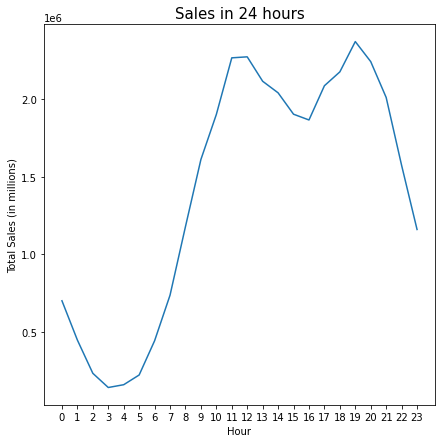

In [31]:
plt.figure(figsize=(7,7))

plt.plot(hour_df.index, hour_df["Total Sales"])
plt.xticks(hour_df.index)
plt.title("Sales in 24 hours", fontdict={'fontsize': 15})
plt.xlabel("Hour")
plt.ylabel("Total Sales (in millions)")
plt.show()

We can oberserve that the sales peak at the morning hours between 9 am amd 12pm and at the evening hours from around 7.30 pm to 9 pm. This indicates that advertising in a full fledged manner around those hours will be beneficial because probability of people noticing the product will be high. However, adveritising on a medium level during the rest of the day i.e., 12pm to 7.30pm is also good becuase the sales compared to peak hours is not very less.

## Question 4 : What products are most often sold together ?

In [32]:
dataf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8
1,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
4,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9


In [33]:
multiple_df=dataf[dataf["Order ID"].duplicated(keep=False)]
multiple_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14
17,176574.0,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",19
18,176574.0,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,"Los Angeles, CA",19
29,176585.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,"Boston, MA",11


In [34]:
multiple_df["Grouped Products"] = dataf.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))

multiple_df=multiple_df[["Order ID", "Grouped Products"]].drop_duplicates()
multiple_df.head()

C:\Users\JASHWA~1\AppData\Local\Temp/ipykernel_21376/115165131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_df["Grouped Products"] = dataf.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))


,Order ID,Grouped Products
2,176560.0,"Google Phone,Wired Headphones"
17,176574.0,"Google Phone,USB-C Charging Cable"
29,176585.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586.0,"AAA Batteries (4-pack),Google Phone"
118,176672.0,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in multiple_df["Grouped Products"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list,2)))

print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 974), (('Google Phone', 'USB-C Charging Cable'), 958), (('iPhone', 'Wired Headphones'), 435), (('Google Phone', 'Wired Headphones'), 402), (('Vareebadd Phone', 'USB-C Charging Cable'), 348), (('iPhone', 'Apple Airpods Headphones'), 343), (('Google Phone', 'Bose SoundSport Headphones'), 218), (('USB-C Charging Cable', 'Wired Headphones'), 157), (('Vareebadd Phone', 'Wired Headphones'), 140), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


The most sold combinations are iPhone and Lightning Charging Cable. The most commom type of combinations are phones and their related accessories. Thus giving offer for phone related accessories or placing them together in a single aisle can improve the sales.

## Question 5 : What product sold the most and what is the sales for each of the product ?

In [36]:
sold_df=dataf[["Product","Quantity Ordered","Total Sales"]].groupby("Product").sum()
sold_df.head()

,Quantity Ordered,Total Sales
Product,,
20in Monitor,4058.0,446339.42
27in 4K Gaming Monitor,6129.0,2390248.71
27in FHD Monitor,7426.0,1113825.74
34in Ultrawide Monitor,6073.0,2307679.27
AA Batteries (4-pack),27131.0,104183.04


C:\Users\JASHWA~1\AppData\Local\Temp/ipykernel_21376/1174084324.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sold_df.index, rotation=270)


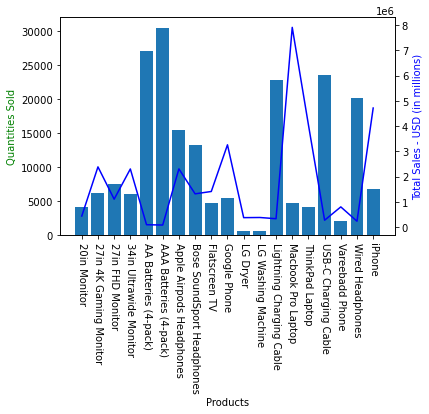

In [37]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(sold_df.index, sold_df["Quantity Ordered"])
ax2.plot(sold_df.index, sold_df["Total Sales"], "b-")
ax1.set_xlabel("Products")
ax1.set_xticklabels(sold_df.index, rotation=270)
ax1.set_ylabel("Quantities Sold",color="g")
ax2.set_ylabel("Total Sales - USD (in millions)", color="b")

plt.show()

This shows that though AA and AAA Batteries have sold most in quantity, it has contributed the lowest in terms of money(sales). On the other hand, Mackbook Pro and ThinkPad Laptop though low in number of items sold, they have given the most amount of money. This data can be more analysed by knowing the profits gained from each products. From the profits data we can guess the best product sold.

### Conclusion

From this basic python based data analysis report we can find a lot of information about the sales and its condition, this can help improve the sales of the organization by showing the teams area which needs improvement. Further, this simple analysis can also lead to new questions which can consequently lead to new answers. This way we can improve the performance of any organisation.